In [10]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt
import statistics
import math

In [11]:
import seaborn as sns
sns.set(font_scale=1.5)

## Пример 1. Различение гипотез о среднем нормальной совокупности.

In [12]:
n = 500
a = 0.2
sigma = 1
alpha = 0.01

norm_rv1 = sps.norm(loc=a, scale=sigma**2)
norm_rv0 = sps.norm(loc=0, scale=sigma**2)
sample1 = norm_rv1.rvs(size=n)
sample0 = norm_rv0.rvs(size=n)

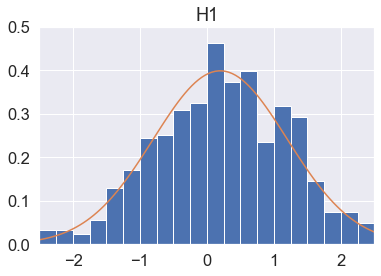

In [13]:
plt.axis([-2.5, 2.5, 0, 0.5])
plt.hist(sample1, bins=20, range=(-2.5, 2.5), density=True)
x = np.linspace(-2.5, 2.5, 100)
plt.title('H1')
plt.plot(x, norm_rv1.pdf(x))

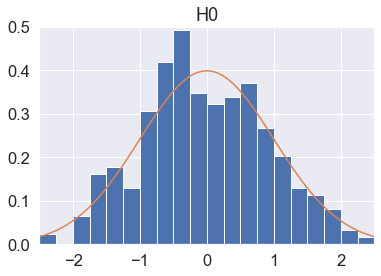

In [14]:
plt.axis([-2.5, 2.5, 0, 0.5])
plt.hist(sample0, bins=20, range=(-2.5, 2.5), density=True)
x = np.linspace(-2.5, 2.5, 100)
plt.title('H0')
plt.plot(x, norm_rv0.pdf(x))

In [15]:
# Находим h2, если верна H0
Q = sps.norm(0, 1).ppf(1-alpha)
h2 = sigma * np.sqrt(n) * Q
print(np.round(h2,2))
if sample1.sum() > h2:
    print('Гипотеза H1 принимается')
else:
    print('Гипотеза H1 отклоняется')

52.02
Гипотеза H1 принимается


In [16]:
print('Сумма наблюдений для выборки в соответствии с гипотезой H1 = {:.2f}'.format(sample1.sum()))
print('Сумма наблюдений для выборки в соответствии с гипотезой H0 = {:.2f}'.format(sample0.sum()))
print('Значение порога h2 =', 52)

Сумма наблюдений для выборки в соответствии с гипотезой H1 = 133.62
Сумма наблюдений для выборки в соответствии с гипотезой H0 = -7.64
Значение порога h2 = 52


In [17]:
# определим вероятность ошибки второго рода
beta = sps.norm(0,1).cdf(Q - (a/sigma)*np.sqrt(n))
print(np.round(beta, 3))

0.016


## Задача 2

In [68]:
lambA = 0.12
lambB = 0.15

expon_rv_A = sps.expon(scale=1/lambA)
expon_rv_B = sps.expon(scale=1/lambB)
sample_A = expon_rv_A.rvs(size=383)
sample_B = expon_rv_B.rvs(size=383)
print('Первые 50 элементов выборки c lambda=0.12:\n', sample_A[:50])
print('Первые 50 элементов выборки c lambda=0.15:\n', sample_B[:50])

print('Теоретическое значение мат. ожидания = {:.2f}'.format(expon_rv_A.mean()))
print('Теоретическое значение стандартного отклонения = {:.2f}'.format(expon_rv_A.std()))
print('Выборочное мат. ожидание = {:.2f}'.format(sample_A.mean()))
print('Выборочное стандартное отклонение = {:.2f}'.format(sample_A.std()))

print('Теоретическое значение мат. ожидания = {:.2f}'.format(expon_rv_B.mean()))
print('Теоретическое значение стандартного отклонения = {:.2f}'.format(expon_rv_B.std()))
print('Выборочное мат. ожидание = {:.2f}'.format(sample_B.mean()))
print('Выборочное стандартное отклонение = {:.2f}'.format(sample_B.std()))

print('Сумма наблюдений для выборки в соответствии с гипотезой H1 = {:.2f}'.format(sample_A.sum()))
print('Сумма наблюдений для выборки в соответствии с гипотезой H0 = {:.2f}'.format(sample_B.sum()))
print('Значение порога h2 =', 2857)

Первые 50 элементов выборки c lambda=0.12:
 [ 3.13610086  9.68915994  8.11262393  9.24946172  6.81665695 22.01560253
 23.93225372  8.53897921  1.33953122  1.39353528  0.32419133 14.6582321
  1.23256994  6.71732219  7.66138951  3.49412361  4.8384608   2.17076517
 38.44262369  3.29586485 11.94368162  4.97043167 18.6854677  24.8200844
  4.85174559 12.64439575  7.58879446 23.83867968  4.03440351  3.63139896
  4.00734981 10.76212331 18.05266708  8.24209772 16.37745949 24.01640516
 15.66797301  4.10404439  5.66564704  1.35352984  8.80915966  4.40117167
  8.97572946  2.86652272  0.67815932  5.66910528  4.84061582  0.65546242
  6.65039185  0.33756926]
Первые 50 элементов выборки c lambda=0.15:
 [18.52573927  3.32480504  2.27536487  8.6258328   2.11937051 11.38915069
  5.34706261 15.03200699  0.88009367  1.90301238  4.64658321  3.00045051
  0.90178318  7.78827628  2.54656387 13.57875471  8.66831948  8.22465795
  1.39776225  9.36439491 13.79379193  1.64986989  3.2969449  20.21385243
  2.0708503 

In [19]:
a = lambda n: 7.33*n+156.67
b = lambda n: 7.33*n-130.33

def modeling(lamb):   
    expon_rv = sps.expon(scale=1/lamb)
    sum = 0
    xs = np.array([])
    i = 0
    while b(i) < sum and sum < a(i):
        x = expon_rv.rvs(size=1)
        sum += x
        xs = np.append(xs, sum)
        i += 1
    return xs, i

133


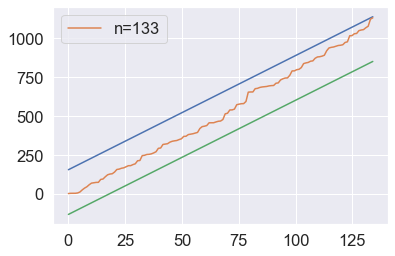

In [74]:
xs, n = modeling(lambA)
x = np.linspace(0, n+1, n)
print(n)
plt.plot(x, a(x))
plt.plot(x, xs, label='n={:d}'.format(n))
plt.plot(x, b(x))
plt.legend()

183


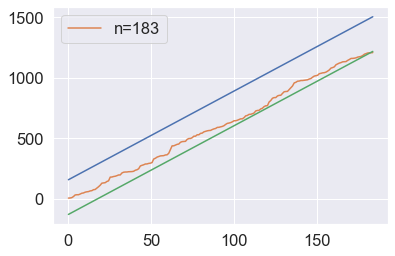

In [85]:
xs, n = modeling(lambB)
x = np.linspace(0, n+1, n)
print(n)
plt.plot(x, a(x))
plt.plot(x, xs, label='n={:d}'.format(n))
plt.plot(x, b(x))
plt.legend()